In [ ]:
import tensorflow as tf
import numpy as np

Lo primero que vamos a hacer es tener dos arrays, uno con los grados en celsius y otro con los grados en Fahrenheit.

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Se va a crear la estructura de la red neuronal con dos capas ocultas, con 3 neuronas, y una de salida.

In [ ]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


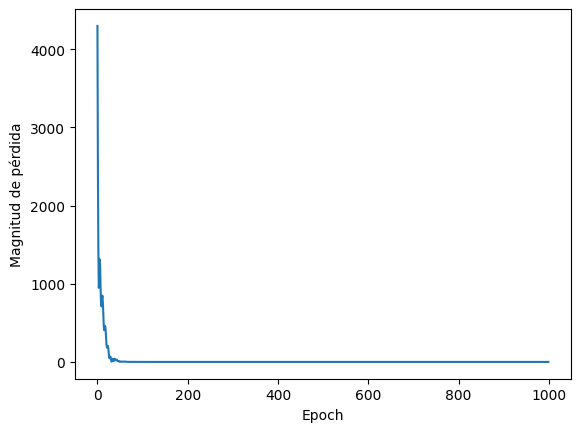

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 78ms/step
El resultado es [[211.74742]] fahrenheit!


In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.14652528,  0.95179486,  0.21095818]], dtype=float32), array([ 2.6644297,  3.0278187, -2.5679538], dtype=float32)]
[array([[-0.9153009 , -0.15394892, -0.5978303 ],
       [-0.7318872 ,  0.14732489, -1.0868434 ],
       [ 1.5070773 ,  0.01206192,  0.34893128]], dtype=float32), array([-3.1665418, -2.1626682, -3.0699944], dtype=float32)]
[array([[-1.1037406 ],
       [-0.16055615],
       [-1.7802116 ]], dtype=float32), array([2.9474921], dtype=float32)]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold

#stratified_k_fold = StratifiedKFold(n_splits=3,shuffle=True)
stratified_k_fold = KFold(n_splits=5)

TypeError: ignored